In [8]:
import pandas as pd #importing pandas
import matplotlib.pyplot as plt #importing matplotlib
import numpy as np #importing numpy
%matplotlib inline

In [9]:
polInc = pd.read_csv("https://data.wprdc.org/datastore/dump/1797ead8-8262-41cc-9099-cbc8a161924b") #Importing data of police incidents in the last 30 days
polInc.drop(["PK", "INCIDENTZONE", "CCR"], axis = 1) #dropping the columns that is police specific such as incident ID

,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,6,2020-10-06T13:09:00,"100 Block Hazlett St Pittsburgh, PA 15214",N,Northview Heights,THEFT,3921(a) Theft by Unlawful Taking or Dispositio...,2609.0,1.0,1.0,-80.001648,40.477122
1,27,2020-11-01T12:00:00,"1100 Block Smallman St Pittsburgh, PA 15222",N,Strip District,HIT AND RUN,3745 Accidents Involving Damage to Unattended ...,203.0,7.0,6.0,-79.993564,40.446010
2,14,2020-10-15T08:30:00,"2100 Block Brownsville Rd Pittsburgh, PA 15210",N,Carrick,CRIM MISCHIEF,3304 Criminal Mischief.,2902.0,4.0,3.0,-79.986524,40.393200
3,10,2020-10-15T07:30:00,"6600 Block Lyric St Pittsburgh, PA 15206",Y,Lincoln-Lemington-Belmar,HARRASSMENT,2709(a) Harassment.,1203.0,9.0,2.0,-79.905145,40.464503
4,27,2020-10-15T09:20:00,Fort Duquesne Blvd & Fort Duquesne Blvd Ramp P...,N,Central Business District,HIT AND RUN,3743 Accidents Involving Damage to Attended Ve...,201.0,6.0,6.0,-80.007438,40.442667
...,...,...,...,...,...,...,...,...,...,...,...,...
2983,0,2020-11-02T15:10:00,"3100 Block California Ave Pittsburgh, PA 15212",N,Marshall-Shadeland,99,9993 PFA Service with Weapons Supplement,2715.0,NaN,NaN,0.000000,0.000000
2984,10,2020-11-02T10:38:00,"2400 Block Chauncey Dr Pittsburgh, PA 15219",Y,Bedford Dwellings,SIMPLE ASSAULT,2701 Simple Assault.,509.0,6.0,3.0,-79.974625,40.449841
2985,10,2020-11-03T09:40:00,"10 Block Larimer Ave Pittsburgh, PA 15206",Y,East Liberty,HARRASSMENT,2709(a) Harassment.,1115.0,9.0,2.0,-79.918052,40.462555
2986,0,2020-11-02T06:35:00,"1800 Block Morningside Ave Pittsburgh, PA 15206",N,Stanton Heights,99,9997 Overdose Death,1018.0,7.0,2.0,-79.926825,40.486507


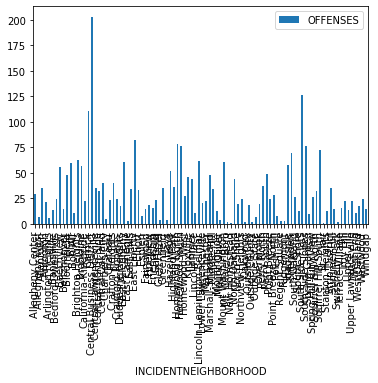

In [48]:
polIncDF = pd.DataFrame(polInc) #Making the dataframe
polIncDF = polIncDF.groupby("INCIDENTNEIGHBORHOOD").count()
polIncDF.plot(kind="bar", y="OFFENSES")

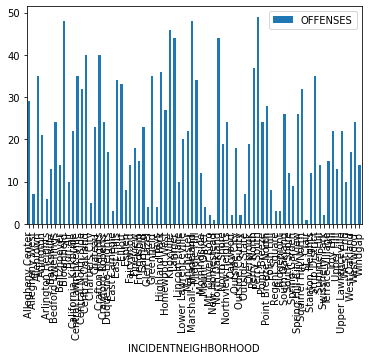

In [49]:
query_mask = polIncDF["OFFENSES"] <= 50 #Reducing Sample size with a filter
polIncDF = polIncDF[query_mask]
polIncDF.plot(kind = "bar", y = "OFFENSES")

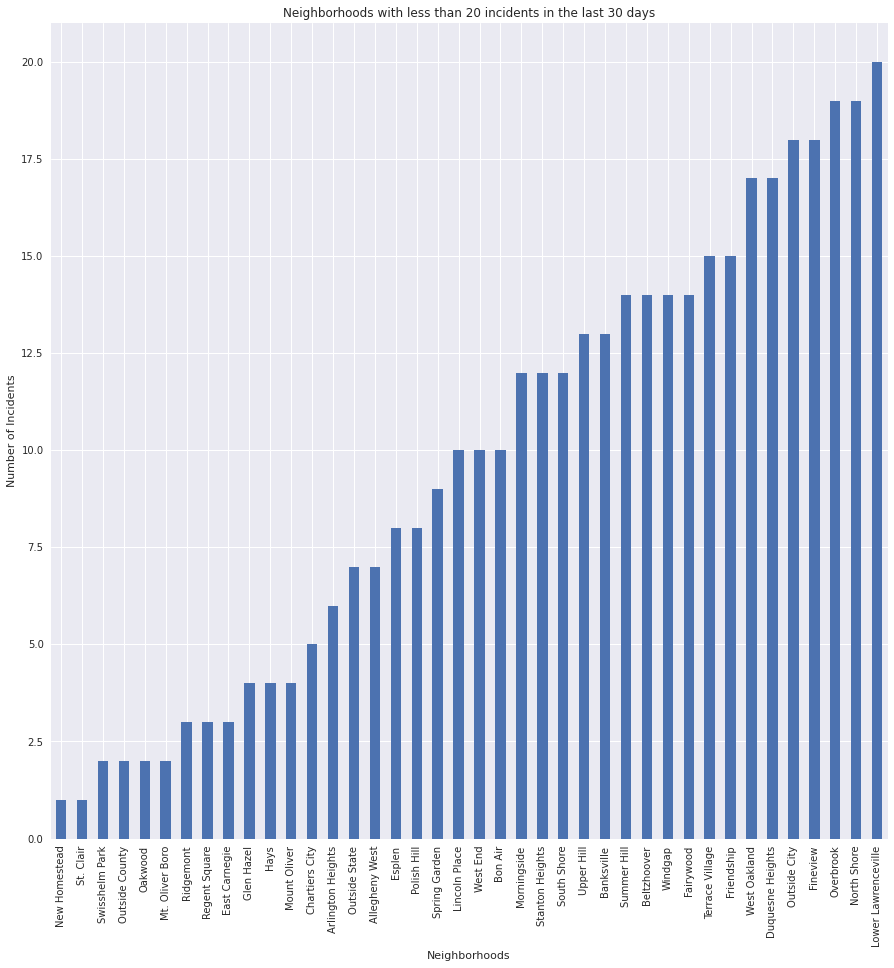

In [68]:
query_mask = polIncDF["OFFENSES"] <= 20 #Reducing Sample size with a filter
polIncDF = polIncDF[query_mask]
polIncBar = polIncDF.sort_values(by = "OFFENSES").plot(kind = "bar",title = "Neighborhoods with less than 20 incidents in the last 30 days", y = "OFFENSES", legend = False, figsize=(15,15))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Incidents")
plt.style.use("seaborn")

Text(0, 0.5, 'UCR Hierarchy')

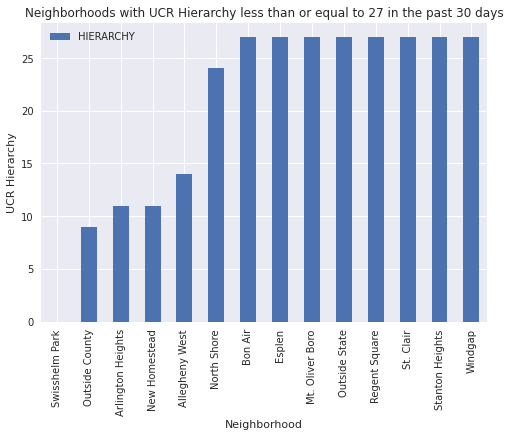

In [95]:
polIncDF2 = pd.DataFrame(polInc) #Making the second dataframe for another standard
polIncDF2 = polIncDF2.groupby("INCIDENTNEIGHBORHOOD")["HIERARCHY"].max() #Finding out the most sever crime based on UCR Hierarchy
polIncDF2 = pd.DataFrame(polIncDF2) #Turning the series back into a dataframe
polIncDF2 = polIncDF2[polIncDF2["HIERARCHY"] <= 27] #Filtering out neighborhoods with severe crimes
polIncDF2.sort_values(by = "HIERARCHY").plot(kind = "bar", title = "Neighborhoods with UCR Hierarchy less than or equal to 27 in the past 30 days")#Plotting the graph
plt.xlabel("Neighborhood")
plt.ylabel("UCR Hierarchy")